In [1]:
%pip install linearmodels

In [2]:
import pandas as pd
df = pd.read_csv('/content/final1.csv')

In [3]:
df.shape

(243692, 41)

In [4]:
df = df[df['amountPaidOnBuildingClaim']<1500000]
df = df[df['buildingDamageAmount']<2000000]
df = df[df['BuildingAge']<150]
df = df[df['amountPaidOnIncreasedCostOfComplianceClaim']<32000]
df = df[df['buildingPropertyValue']!=0]

In [5]:
import numpy as np

# Check the available columns in the dataframe
print(df.columns)

log_transform_cols = [
    'policyCount',
    'totalBuildingInsuranceCoverage',
    'buildingPropertyValue',
    'buildingReplacementCost', # Corrected column name
    'waterDepth',
]

for col in log_transform_cols:
    # Add a small constant to handle zero values before taking the log
    df['log' + col] = np.log(df[col] + 1)

# For waterDepth, use signed log transformation as it can be negative
df['signedLogWwaterDepth'] = np.sign(df['waterDepth']) * np.log(np.abs(df['waterDepth']) + 1)

display(df.head())

Index(['Unnamed: 0', 'agricultureStructureIndicator', 'policyCount',
       'elevatedBuildingIndicator', 'houseWorship', 'locationOfContents',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'smallBusinessIndicatorBuilding',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'primaryResidenceIndicator', 'buildingDamageAmount',
       'buildingPropertyValue', 'disasterAssistanceCoverageRequired',
       'ficoNumber', 'floodWaterDuration', 'floodproofedIndicator',
       'iccCoverage', 'netIccPaymentAmount', 'nfipRatedCommunityNumber',
       'numberOfUnits', 'buildingReplacementCost', 'replacementCostBasis',
       'stateOwnedIndicator', 'waterDepth', 'rentalPropertyIndicator',
       'reportedZipCode', 'countyCode', 'censusTr

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,agricultureStructureIndicator,policyCount,elevatedBuildingIndicator,houseWorship,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,...,censusBlockGroupFips,latitude,longitude,BuildingAge,logpolicyCount,logtotalBuildingInsuranceCoverage,logbuildingPropertyValue,logbuildingReplacementCost,logwaterDepth,signedLogWwaterDepth
0,3,0,1,1,0,3.0,1.0,0,10.0,1.0,...,4.820122e+11,29.9,-95.4,39.649555,0.693147,12.429220,11.637741,11.719753,0.693147,0.693147
1,5,0,1,0,0,4.0,2.0,0,10.0,2.0,...,3.712901e+11,34.1,-77.9,28.153320,0.693147,11.480413,11.508546,11.647815,0.000000,0.000000
2,41,0,1,0,0,4.0,2.0,0,10.0,1.0,...,3.403115e+11,40.9,-74.2,36.254620,0.693147,10.755794,11.429413,11.627860,0.693147,0.693147
3,53,0,1,1,0,3.0,1.0,0,10.0,4.0,...,2.211395e+11,29.9,-92.1,23.334702,0.693147,10.499601,11.595565,12.011079,1.791759,1.791759
4,62,0,1,0,0,3.0,1.0,0,10.0,1.0,...,1.202701e+11,27.2,-82.0,9.483915,0.693147,11.130215,10.628884,0.000000,1.386294,1.386294


In [6]:
import statsmodels.api as sm

# Define the independent variables (X) and the dependent variable (y)
X_cols = [  'logpolicyCount',
 'postFIRMConstructionIndicator',
 'smallBusinessIndicatorBuilding',
 'logtotalBuildingInsuranceCoverage',
 'totalContentsInsuranceCoverage',
#  'yearOfLoss',
 'primaryResidenceIndicator',
 'buildingDamageAmount',
#  'logbuildingPropertyValue',
 'iccCoverage',
 'logbuildingReplacementCost',
 'signedLogWwaterDepth',
 'rentalPropertyIndicator',
#  'BuildingAge',
]

y = df['amountPaidOnBuildingClaim']
X = df[X_cols]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the OLS summary
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     amountPaidOnBuildingClaim   R-squared:                       0.871
Model:                                   OLS   Adj. R-squared:                  0.871
Method:                        Least Squares   F-statistic:                 1.493e+05
Date:                       Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                               05:23:12   Log-Likelihood:            -2.7335e+06
No. Observations:                     243498   AIC:                         5.467e+06
Df Residuals:                         243486   BIC:                         5.467e+06
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [7]:
# Perform the Ramsey RESET test
reset_test = sm.stats.diagnostic.linear_reset(model)

# Print the test results
print(reset_test)

<Wald test (chi2): statistic=75238.11315022569, p-value=0.0, df_denom=2>


## First IV combination

In [8]:
from linearmodels.iv import IV2SLS
import statsmodels.api as sm

# Define the endogenous variable, instrumental variables, and other exogenous variables
endog = df['amountPaidOnBuildingClaim']
exog = sm.add_constant(df[['logpolicyCount',
                           'postFIRMConstructionIndicator',
                           'totalContentsInsuranceCoverage',
                           'primaryResidenceIndicator',
                           'buildingDamageAmount',
                           'logbuildingPropertyValue',
                           'iccCoverage',
                           'logbuildingReplacementCost',
                           'signedLogWwaterDepth',
                           'rentalPropertyIndicator',
                           'BuildingAge']])
# Exogenous variables which are also included in the original regression
endog_variable = df['logtotalBuildingInsuranceCoverage']
instrumental_variables = df[['smallBusinessIndicatorBuilding', 'yearOfLoss']]

# Fit the 2SLS model
tsls_model = IV2SLS(endog, exog, endog_variable, instrumental_variables).fit()

# Print the 2SLS summary
print(tsls_model.summary)

# Perform the Wu-Hausman test
hausman_test = tsls_model.wu_hausman()

# Print the test results
print(hausman_test)

hansen_j = tsls_model.sargan
print("\nHansen J Test (Sargan Test):")
print(hansen_j)

                              IV-2SLS Estimation Summary                             
Dep. Variable:     amountPaidOnBuildingClaim   R-squared:                      0.5217
Estimator:                           IV-2SLS   Adj. R-squared:                 0.5217
No. Observations:                     243498   F-statistic:                 7.933e+04
Date:                       Fri, Jun 20 2025   P-value (F-stat)                0.0000
Time:                               05:23:19   Distribution:                 chi2(12)
Cov. Estimator:                       robust                                         
                                                                                     
                                         Parameter Estimates                                         
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const 

The Hansen J test for overidentification yields a test statistic of 423.64 (p-value ~ 0.000). Thus, we reject the null hypothesis of instrument exogeneity. Rejecting the null hypothesis means that there is strong statistical evidence to suggest that at least one of instrumental variables is not valid. In other words, it is likely correlated with the error term in your structural equation.

## Second IV Combination

In [9]:
from linearmodels.iv import IV2SLS
import statsmodels.api as sm

# Define the endogenous variable, instrumental variables, and other exogenous variables
endog = df['amountPaidOnBuildingClaim']
# Remove 'logbuildingPropertyValue' from exog when it's the endogenous variable
exog_cols = ['logpolicyCount',
             'postFIRMConstructionIndicator',
             'totalContentsInsuranceCoverage',
             'primaryResidenceIndicator',
             'buildingDamageAmount',
             'iccCoverage',
             'logbuildingReplacementCost',
             'signedLogWwaterDepth',
             'rentalPropertyIndicator',
             ]
exog = sm.add_constant(df[exog_cols])

endog_variable = df['logbuildingPropertyValue']
instrumental_variables = df[['BuildingAge', 'yearOfLoss']]

# Fit the 2SLS model
tsls_model = IV2SLS(endog, exog, endog_variable, instrumental_variables).fit()

# Print the 2SLS summary
print(tsls_model.summary)

# Perform the Wu-Hausman test
hausman_test = tsls_model.wu_hausman()

# Print the test results
print(hausman_test)

                              IV-2SLS Estimation Summary                             
Dep. Variable:     amountPaidOnBuildingClaim   R-squared:                      0.8009
Estimator:                           IV-2SLS   Adj. R-squared:                 0.8009
No. Observations:                     243498   F-statistic:                 1.722e+05
Date:                       Fri, Jun 20 2025   P-value (F-stat)                0.0000
Time:                               05:23:31   Distribution:                 chi2(10)
Cov. Estimator:                       robust                                         
                                                                                     
                                       Parameter Estimates                                        
                                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------------
const          

We used a two-stage least squares (2SLS) regression to estimate the effect of logbuildingPropertyValue on amountPaidOnBuildingClaim, using BuildingAge and yearOfLoss as instrumental variables. The Wu-Hausman test statistic was 2053.1074 (p < 0.001), strongly rejecting the null hypothesis of exogeneity. This confirms that logbuildingPropertyValue is endogenous in our setting, and that OLS estimates would be inconsistent. Therefore, IV/2SLS results are required for unbiased inference.

**BP**

In [10]:
# Step 1: First-stage regression
first_stage_X = sm.add_constant(pd.concat([df[exog_cols], df[['BuildingAge', 'yearOfLoss']]], axis=1))
first_stage_y = df['logbuildingPropertyValue']

first_stage_model = sm.OLS(first_stage_y, first_stage_X).fit()
fitted_endo = first_stage_model.fittedvalues



In [11]:
# Step 2: Combine exogenous vars + fitted endogenous variable
X_full = sm.add_constant(pd.concat([df[exog_cols], fitted_endo.rename('fitted_logbuildingPropertyValue')], axis=1))
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Extract residuals from 2SLS model
residuals = tsls_model.resids

# Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, X_full)
labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
print("\n✅ Breusch-Pagan Test (Heteroskedasticity):")
for l, v in zip(labels, bp_test):
    print(f"{l}: {v:.4f}")

# Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print(f"\n✅ Durbin-Watson Test (Autocorrelation): {dw_stat:.4f}")



✅ Breusch-Pagan Test (Heteroskedasticity):
LM Statistic: 22932.8470
LM p-value: 0.0000
F-statistic: 2531.6103
F p-value: 0.0000

✅ Durbin-Watson Test (Autocorrelation): 1.9912


In [12]:
import statsmodels.api as sm
import pandas as pd

# Step 1: Extract fitted values from 2SLS
fitted_vals = tsls_model.fitted_values.squeeze()

# Step 2: Create powers of fitted values
fitted_sq = fitted_vals ** 2
fitted_cu = fitted_vals ** 3

# Step 3: Combine regressors + powers of fitted
X_reset = sm.add_constant(pd.concat([df[exog_cols],
                                     fitted_sq.rename('fitted_sq'),
                                     fitted_cu.rename('fitted_cu')], axis=1))

# Step 4: Run OLS (not 2SLS) for RESET test (this is diagnostic only)
y = df['amountPaidOnBuildingClaim']
ols_reset = sm.OLS(y, X_reset).fit()

# Step 5: F-test for joint significance of fitted_sq and fitted_cu
print("\n✅ Ramsey RESET Test (Functional Form Misspecification):")
print(ols_reset.f_test("fitted_sq = 0, fitted_cu = 0"))



✅ Ramsey RESET Test (Functional Form Misspecification):
<F test: F=43982.40859659575, p=0.0, df_denom=2.43e+05, df_num=2>


/tmp/ipython-input-13-1888011781.py:12: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


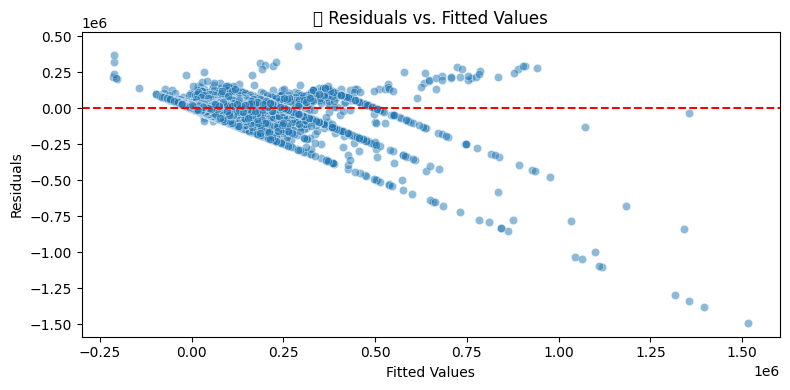

/tmp/ipython-input-13-1888011781.py:19: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


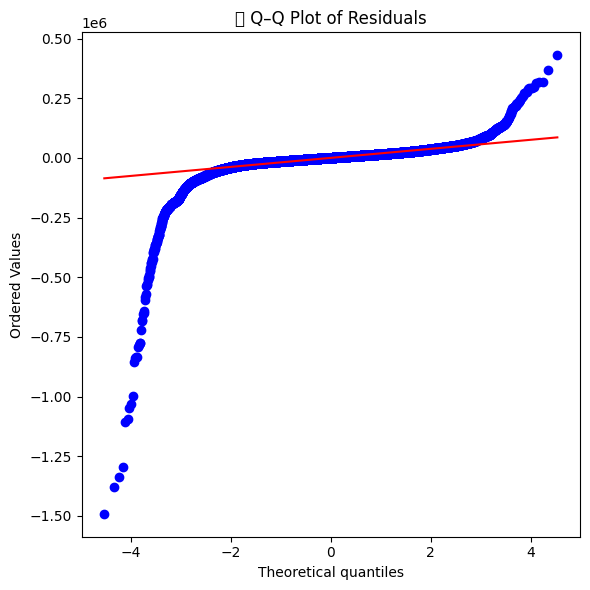

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1️⃣ Residuals vs. Fitted Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=tsls_model.fitted_values.squeeze(), y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("✅ Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# 2️⃣ Q-Q Plot of Residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("✅ Q–Q Plot of Residuals")
plt.tight_layout()
plt.show()


In [14]:
pip install libpysal esda


In [15]:
!pip install --quiet libpysal esda


In [16]:
# Sample 5000 observations for safety; adjust if needed
df_sampled = df[['latitude', 'longitude']].copy()
df_sampled['residuals'] = residuals
df_sampled = df_sampled.dropna().sample(n=5000, random_state=42)
import numpy as np
from libpysal.weights import KNN
from esda.moran import Moran

# Coordinates list
coords = list(zip(df_sampled['longitude'], df_sampled['latitude']))

# Create a spatial weights matrix using 5 nearest neighbors
w_knn = KNN(coords, k=5)

# Convert residuals to numpy array
resid_array = df_sampled['residuals'].to_numpy()

# Run Moran’s I test
mi_knn = Moran(resid_array, w_knn)

# Print results
print("✅ Moran’s I Test using K-Nearest Neighbors (k=5):")
print(f"• Moran's I        : {mi_knn.I:.4f}")
print(f"• Expected I (H0)  : {mi_knn.EI:.4f}")
print(f"• Z-score          : {mi_knn.z_norm:.4f}")
print(f"• P-value          : {mi_knn.p_norm:.4f}")


/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 147 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


✅ Moran’s I Test using K-Nearest Neighbors (k=5):
• Moran's I        : 0.0515
• Expected I (H0)  : -0.0002
• Z-score          : 6.8050
• P-value          : 0.0000


In [18]:
import numpy as np
from libpysal.weights import KNN
from esda.moran import Moran

# Sample 5000 observations for safety
df_sampled = df[['latitude', 'longitude']].copy()
df_sampled['residuals'] = residuals
df_sampled = df_sampled.dropna().sample(n=5000, random_state=42)

# Prepare coordinates and residuals
coords = list(zip(df_sampled['longitude'], df_sampled['latitude']))
resid_array = df_sampled['residuals'].to_numpy()

# List of k values to test
k_values = [3, 5, 7, 10, 15]

print("✅ Moran’s I Test for Different k (KNN):\n")

# Loop over each k
for k in k_values:
    try:
        w_knn = KNN(coords, k=k)
        mi = Moran(resid_array, w_knn)
        print(f"🔹 k = {k}")
        print(f"   • Moran's I       : {mi.I:.4f}")
        print(f"   • Expected I (H0) : {mi.EI:.4f}")
        print(f"   • Z-score         : {mi.z_norm:.4f}")
        print(f"   • P-value         : {mi.p_norm:.4f}\n")
    except Exception as e:
        print(f"❌ Error at k = {k}: {e}\n")


✅ Moran’s I Test for Different k (KNN):



/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 273 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


🔹 k = 3
   • Moran's I       : 0.0709
   • Expected I (H0) : -0.0002
   • Z-score         : 7.4484
   • P-value         : 0.0000



/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 147 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


🔹 k = 5
   • Moran's I       : 0.0515
   • Expected I (H0) : -0.0002
   • Z-score         : 6.8050
   • P-value         : 0.0000



/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 84 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


🔹 k = 7
   • Moran's I       : 0.0471
   • Expected I (H0) : -0.0002
   • Z-score         : 7.2681
   • P-value         : 0.0000



/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 43 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


🔹 k = 10
   • Moran's I       : 0.0537
   • Expected I (H0) : -0.0002
   • Z-score         : 9.7300
   • P-value         : 0.0000



/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


🔹 k = 15
   • Moran's I       : 0.0534
   • Expected I (H0) : -0.0002
   • Z-score         : 11.6680
   • P-value         : 0.0000



/tmp/ipython-input-19-897964680.py:8: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 800x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


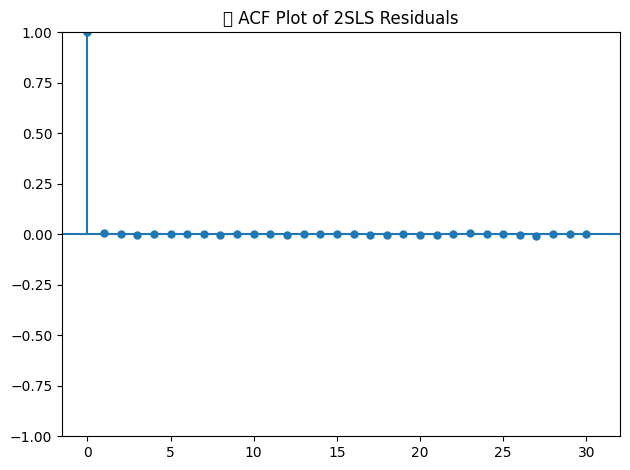

In [19]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot of residuals
plt.figure(figsize=(8, 4))
plot_acf(residuals, lags=30, alpha=0.05)
plt.title('✅ ACF Plot of 2SLS Residuals')
plt.tight_layout()
plt.show()



✅ Ljung-Box Test Results (First 10 Lags):
      lb_stat  lb_pvalue
1    4.760006   0.029128
2    4.875520   0.087356
3    7.827340   0.049718
4    8.152607   0.086145
5    8.309700   0.139973
6    8.309772   0.216276
7    8.526766   0.288440
8   10.292158   0.245116
9   10.452983   0.315072
10  10.486440   0.398901


/tmp/ipython-input-20-717175469.py:19: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


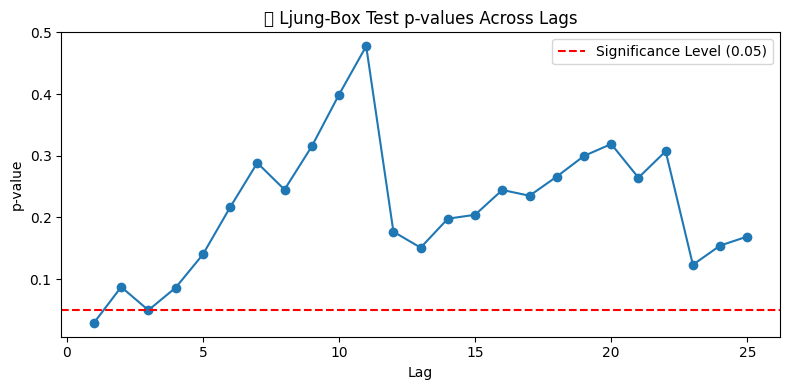

In [20]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

# Perform Ljung-Box test up to 30 lags
ljung_results = acorr_ljungbox(residuals, lags=25, return_df=True)

# Display first few results
print("\n✅ Ljung-Box Test Results (First 10 Lags):")
print(ljung_results.head(10))

# Plot p-values
plt.figure(figsize=(8, 4))
plt.plot(ljung_results.index, ljung_results['lb_pvalue'], marker='o')
plt.axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title('✅ Ljung-Box Test p-values Across Lags')
plt.xlabel('Lag')
plt.ylabel('p-value')
plt.legend()
plt.tight_layout()
plt.show()


## Weak Instrument Test

In [21]:
# Print first-stage summary (for F-statistic)
print(tsls_model.first_stage)


              First Stage Estimation Results             
                                 logbuildingPropertyValue
---------------------------------------------------------
R-squared                                          0.3468
Partial R-squared                                  0.0160
Shea's R-squared                                   0.0160
Partial F-statistic                                2445.4
P-value (Partial F-stat)                           0.0000
Partial F-stat Distn                              chi2(2)
================================             ============
const                                             -25.651
                                                (-32.924)
logpolicyCount                                     0.9448
                                                 (68.579)
postFIRMConstructionIndicator                      0.2077
                                                 (51.824)
totalContentsInsuranceCoverage                  6.111e-06
              

The first-stage regression for logbuildingPropertyValue yields a partial F-statistic of 2445.4 (p < 0.001), far exceeding the conventional threshold of 10. This confirms that the instruments (BuildingAge, yearOfLoss) are highly relevant and not weak. Thus, you can be confident in the strength of your instruments for the IV/2SLS estimation.

In [22]:
hansen_j = tsls_model.sargan
print("\nHansen J Test (Sargan Test):")
print(hansen_j)


Hansen J Test (Sargan Test):
Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 0.7646
P-value: 0.3819
Distributed: chi2(1)


The Hansen J test for overidentification yields a test statistic of 0.76 (p-value = 0.38). Thus, we fail to reject the null hypothesis of instrument exogeneity, supporting the validity of the instruments used in the IV estimation.

## GMM

In [23]:
from linearmodels.iv import IVGMM
import statsmodels.api as sm
from scipy.stats import chi2

# 1. Define variables
y = df['amountPaidOnBuildingClaim']  # Dependent variable
X = sm.add_constant(df[exog_cols])   # Exogenous regressors (with constant)
endog = df['logbuildingPropertyValue']  # Endogenous regressor
instr = df[['BuildingAge', 'yearOfLoss']]  # Instruments

# 2. Build IVGMM model
ivgmm_model = IVGMM(dependent=y, exog=X, endog=endog, instruments=instr)
ivgmm_results = ivgmm_model.fit(cov_type='robust')  # robust = heteroskedasticity-robust

print(ivgmm_results.summary)


                              IV-GMM Estimation Summary                              
Dep. Variable:     amountPaidOnBuildingClaim   R-squared:                      0.8008
Estimator:                            IV-GMM   Adj. R-squared:                 0.8008
No. Observations:                     243498   F-statistic:                 1.737e+05
Date:                       Fri, Jun 20 2025   P-value (F-stat)                0.0000
Time:                               06:45:13   Distribution:                 chi2(10)
Cov. Estimator:                       robust                                         
                                                                                     
                                       Parameter Estimates                                        
                                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------------
const          

In [24]:
# First-stage regression: regress endog on instruments + exog
Z = sm.add_constant(pd.concat([instr, X.drop(columns='const')], axis=1))
# Use 'HC1' for heteroskedasticity-robust standard errors in OLS
first_stage = sm.OLS(endog, Z).fit(cov_type='HC0')
print(first_stage.summary())

# Check F-statistic of instruments jointly
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Print partial R^2 and F-test for instruments
# The f_test will now use the robust covariance matrix
f_test = first_stage.f_test("BuildingAge = 0, yearOfLoss = 0")
print(f"Weak instrument F-statistic: {float(f_test.fvalue):.4f}")
print(f"P-value: {float(f_test.pvalue):.4f}")

                               OLS Regression Results                               
Dep. Variable:     logbuildingPropertyValue   R-squared:                       0.347
Model:                                  OLS   Adj. R-squared:                  0.347
Method:                       Least Squares   F-statistic:                     5959.
Date:                      Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                              06:45:13   Log-Likelihood:            -2.4423e+05
No. Observations:                    243498   AIC:                         4.885e+05
Df Residuals:                        243486   BIC:                         4.886e+05
Df Model:                                11                                         
Covariance Type:                        HC0                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

In [25]:
print("Overidentification Test (Hansen's J):")
print(f"Statistic: {ivgmm_results.j_stat.stat:.4f}")
print(f"p-value: {ivgmm_results.j_stat.pval:.4f}")


Overidentification Test (Hansen's J):
Statistic: 0.6077
p-value: 0.4357
